In [5]:
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('groceries_dataset.csv')

In [9]:
print("Head of DataFrame")
display(df.head())

Head of DataFrame


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [11]:
print("DataFrame Info")
df.info()

DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [13]:
print("Missing Values")
display(df.isnull().sum())

Missing Values


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [17]:
# Ensure datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date to get a proper start point
df = df.sort_values(by='Date')

# Get starting and ending date for the first week
start_date = df['Date'].min()
end_date = start_date + pd.Timedelta(days=6)

print(f"Filtering transactions from {start_date.date()} to {end_date.date()}")

# Filter for the first week only
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Group by Date and Member_number to create transaction baskets
grouped_transactions = filtered_df.groupby(['Date', 'Member_number'])['itemDescription'].apply(list)

# Reset index to a clean DataFrame
grouped_transactions = grouped_transactions.reset_index(name='Items')

# Show all rows (not truncated)
pd.set_option('display.max_rows', None)
display(grouped_transactions)

Filtering transactions from 2014-01-01 to 2014-01-07


,Date,Member_number,Items
0,2014-01-01,1249,"[coffee, citrus fruit]"
1,2014-01-01,1381,"[curd, soda]"
2,2014-01-01,1440,"[other vegetables, yogurt]"
3,2014-01-01,1659,"[frozen vegetables, specialty chocolate]"
4,2014-01-01,1789,"[candles, hamburger meat]"
5,2014-01-01,1922,"[tropical fruit, other vegetables]"
6,2014-01-01,2226,"[bottled water, sausage]"
7,2014-01-01,2237,"[Instant food products, bottled water]"
8,2014-01-01,2351,"[shopping bags, cleaner]"
9,2014-01-01,2542,"[sliced cheese, bottled water]"


In [49]:
transactions = grouped_transactions['Items'].tolist()


In [51]:
from collections import Counter
from itertools import combinations

# Define transactions list again
transactions = grouped_transactions['Items'].tolist()

# Flatten all transactions into one list of items
all_items = [item for transaction in transactions for item in transaction]

# Count individual item frequencies
item_counts = Counter(all_items)

# Calculate support
total_transactions = len(transactions)
min_support = 0.03  # 3%

frequent_items = {
    item: count / total_transactions
    for item, count in item_counts.items()
    if (count / total_transactions) >= min_support
}

# Sort by support descending
frequent_items = dict(sorted(frequent_items.items(), key=lambda x: x[1], reverse=True))

print("Frequent 1-itemsets:")
for item, support in frequent_items.items():
    print(f"{item}: {support:.3f}")



Frequent 1-itemsets:
whole milk: 0.152
soda: 0.120
other vegetables: 0.108
rolls/buns: 0.089
yogurt: 0.076
bottled water: 0.076
domestic eggs: 0.063
brown bread: 0.057
curd: 0.051
whipped/sour cream: 0.051
waffles: 0.051
white bread: 0.051
margarine: 0.051
frozen vegetables: 0.044
tropical fruit: 0.044
fruit/vegetable juice: 0.044
newspapers: 0.044
canned beer: 0.044
coffee: 0.038
citrus fruit: 0.038
shopping bags: 0.038
hamburger meat: 0.032
dishes: 0.032
butter: 0.032
dessert: 0.032
beef: 0.032
pastry: 0.032


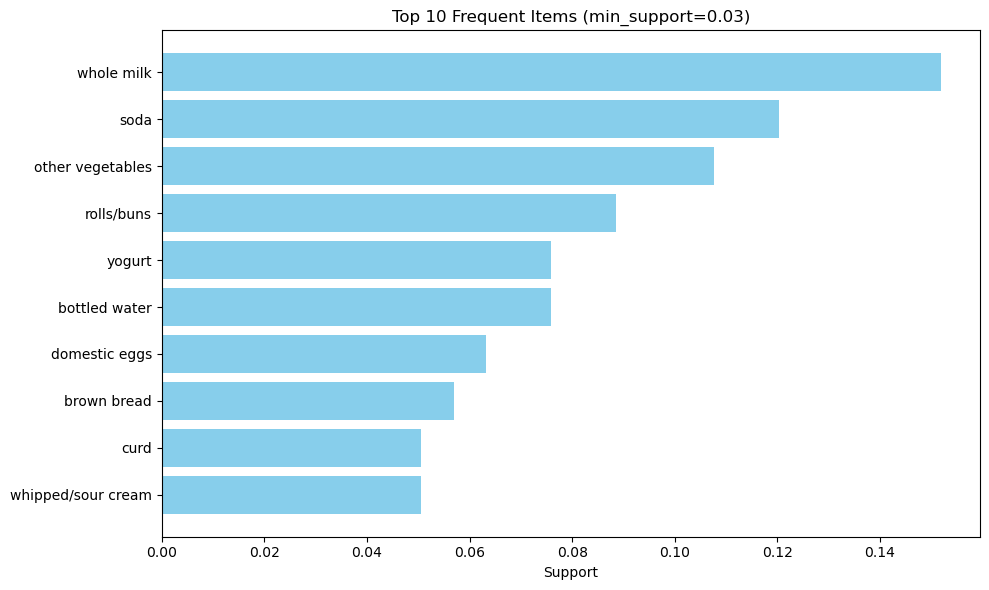

In [53]:
import matplotlib.pyplot as plt

# Top N items
top_n = 10
top_items = list(frequent_items.items())[:top_n]

items = [item for item, _ in top_items]
supports = [support for _, support in top_items]

plt.figure(figsize=(10, 6))
plt.barh(items[::-1], supports[::-1], color='skyblue')
plt.xlabel('Support')
plt.title(f'Top {top_n} Frequent Items (min_support={min_support})')
plt.tight_layout()
plt.show()

In [55]:
print(f"Total transactions: {total_transactions}")
print(f"Minimum count required: {min_support * total_transactions:.0f}")

Total transactions: 158
Minimum count required: 5


In [57]:
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt

min_support = 0.01  # Try lowering this if nothing appears

# Get all frequent item names
frequent_item_names = set(frequent_items.keys())

# Filter transactions to only include frequent items
filtered_transactions = [
    [item for item in transaction if item in frequent_item_names]
    for transaction in transactions
]

# Count pairs
pair_counts = Counter()

for transaction in filtered_transactions:
    for combo in combinations(sorted(set(transaction)), 2):
        pair_counts[combo] += 1

# Calculate pair support
frequent_pairs = {
    pair: count / total_transactions
    for pair, count in pair_counts.items()
    if (count / total_transactions) >= min_support
}

# Sort by support descending
frequent_pairs = dict(sorted(frequent_pairs.items(), key=lambda x: x[1], reverse=True))

# Display output
print("\nFrequent 2-itemsets:")
for pair, support in list(frequent_pairs.items())[:10]:
    print(f"{pair}: {support:.3f}")



Frequent 2-itemsets:
('other vegetables', 'yogurt'): 0.025
('domestic eggs', 'soda'): 0.019
('curd', 'soda'): 0.013
('bottled water', 'whipped/sour cream'): 0.013
('waffles', 'whole milk'): 0.013
('shopping bags', 'waffles'): 0.013
('beef', 'whole milk'): 0.013
('newspapers', 'whole milk'): 0.013
('brown bread', 'curd'): 0.013
('dishes', 'waffles'): 0.013


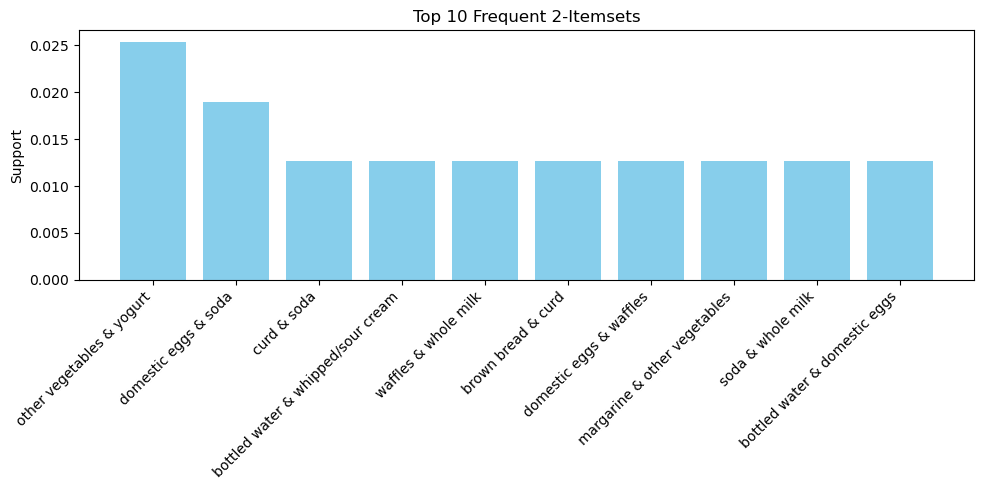

In [47]:
# Bar chart for top 10 pairs
top_pairs = list(frequent_pairs.items())[:10]

if top_pairs:
    labels = [f"{a} & {b}" for (a, b), _ in top_pairs]
    supports = [support for _, support in top_pairs]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, supports, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Support")
    plt.title("Top 10 Frequent 2-Itemsets")
    plt.tight_layout()
    plt.show()
else:
    print("No frequent 2-itemsets meet the minimum support threshold.")


In [69]:
min_confidence = 0.3  # Confidence threshold (e.g., 30%)
strong_rules = []

# Loop through all frequent pairs
for (A, B), support_AB in frequent_pairs.items():
    support_A = frequent_items.get(A, 0)
    support_B = frequent_items.get(B, 0)

    # A -> B
    if support_A > 0:
        confidence_A_B = support_AB / support_A
        if confidence_A_B >= min_confidence:
            strong_rules.append((f"{A} -> {B}", confidence_A_B))
    
    # Optional: B -> A
    if support_B > 0:
        confidence_B_A = support_AB / support_B
        if confidence_B_A >= min_confidence:
            strong_rules.append((f"{B} -> {A}", confidence_B_A))


In [71]:
# Sort by confidence descending
strong_rules = sorted(strong_rules, key=lambda x: x[1], reverse=True)

print("\nStrong Association Rules (Confidence ≥ {:.0%}):\n".format(min_confidence))
for rule, confidence in strong_rules:
    print(f"{rule}: {confidence:.2f}")



Strong Association Rules (Confidence ≥ 30%):

beef -> whole milk: 0.40
dishes -> waffles: 0.40
yogurt -> other vegetables: 0.33
shopping bags -> waffles: 0.33
domestic eggs -> soda: 0.30


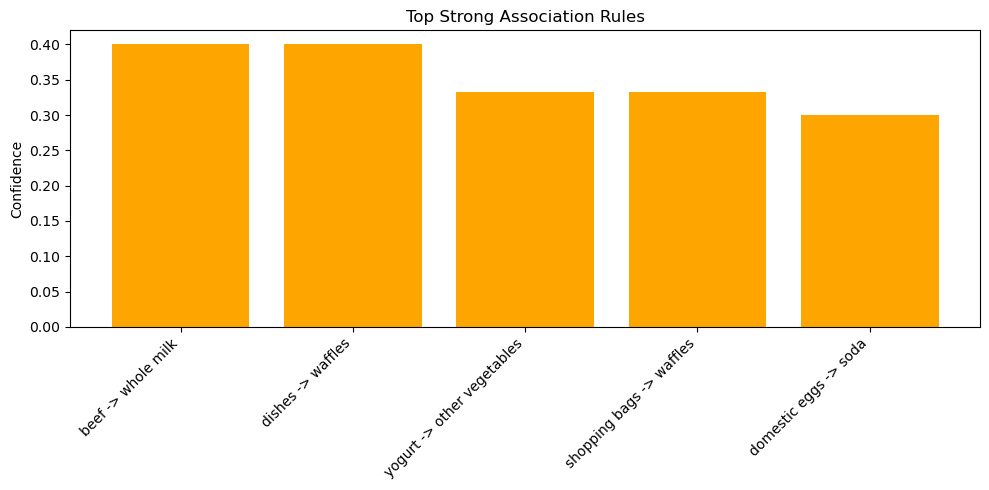

In [73]:
# Visualize top 10 rules
top_rules = strong_rules[:10]
if top_rules:
    labels = [rule for rule, _ in top_rules]
    confidences = [conf for _, conf in top_rules]

    plt.figure(figsize=(10, 5))
    plt.bar(labels, confidences, color='orange')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Confidence")
    plt.title("Top Strong Association Rules")
    plt.tight_layout()
    plt.show()
else:
    print("No strong rules found with the current confidence threshold.")
